In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk          # Library used for nlp processing

In [2]:
amazon = pd.read_csv("amazonreviews.tsv",sep= "\t" )

In [3]:
amazon.head(10)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
5,pos,an absolute masterpiece: I am quite sure any o...
6,neg,"Buyer beware: This is a self-published book, a..."
7,pos,Glorious story: I loved Whisper of the wicked ...
8,pos,A FIVE STAR BOOK: I just finished reading Whis...
9,pos,Whispers of the Wicked Saints: This was a easy...


In [4]:
amazon.shape

(10000, 2)

In [5]:
# Problem Statement
 # Built a predective model which can classify email weather the  spam or ham

In [6]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [7]:
amazon = amazon.iloc[ : , [0,1]]  # deleting the unnamed last 3 columns which is not required
amazon

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [8]:
amazon.label.replace({"pos" : 0, "neg":1}, inplace = True) # chage thelabelling of ham and spam

In [9]:
amazon.review  = amazon.review.str.lower()  
# Converting all document into lowercase because pyhon is case sensitive
# because of that it read two same words different if they have in different cases 
# for example = like CAR car


In [10]:
from nltk.corpus import stopwords 

In [11]:
# at the first time importing we get error if we are not imported the stopwords 
# error like Stopwords doesnot exist 
# for that we need to download  the stopword

nltk.download("stopwords")   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
len(stopwords.words("english")) # 179 Stopwords

179

In [14]:
import string
string.punctuation  # Shows punctuation

# Why importing? Later on in the document we willremove this punctuations 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def text_process(mess):            ### # Creating a user defined function def = user defined fun, Fun name = text_process, mess = argument
    """                                                        ## It is a doc string
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [16]:
amazon["review"].apply(text_process) # now there is no puncutation & stopwords in dataframe messages  has been removed 

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer will be use to count each and every word


In [18]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(amazon["review"])

In [19]:
bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [20]:
len(bow_transformer.vocabulary_)
# This 40040 is no of unique words

40040

In [21]:
amazon_bow = bow_transformer.transform(amazon.review) #creating dump document metrics

In [22]:
amazon_bow.shape  # messsage_bow is a term document matrix (TDM) 
# here each unique word has  become a column in data frame
# this type of representation known as a term document matrix
# use this matrix for building model and do prediction 

(10000, 40040)

In [23]:
type(amazon_bow) # its show spars matrix because zeros is more in matrix in tdf

scipy.sparse.csr.csr_matrix

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(amazon_bow, amazon.label, test_size = 0.2)

In [26]:
x_train.shape

(8000, 40040)

In [27]:
y_train.shape

(8000,)

In [28]:
x_test.shape

(2000, 40040)

In [29]:
y_test.shape

(2000,)

In [30]:
# Build the model And predict the model

In [31]:
from sklearn.naive_bayes import MultinomialNB

naive_bay = MultinomialNB()

In [32]:
spam_nb_model = naive_bay.fit(x_train, y_train)

In [33]:
spam_nb_model.predict(x_test)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
pred_value = spam_nb_model.predict(x_test)

In [35]:
pred_value

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
table = confusion_matrix(pred_value, y_test) # y_test because we are doing prediction on test data

In [38]:
table   # best thing in this confusion matrix is we are getting good accuracy for both classes ham and spam

array([[815, 133],
       [207, 845]], dtype=int64)

In [39]:
accuracy = table.diagonal().sum()/table.sum() * 100
accuracy                                

83.0

In [40]:
785/(785+207)# accuracy for the ham class

0.7913306451612904

In [41]:
854/(854+154) #accuracy for the spam class

0.8472222222222222

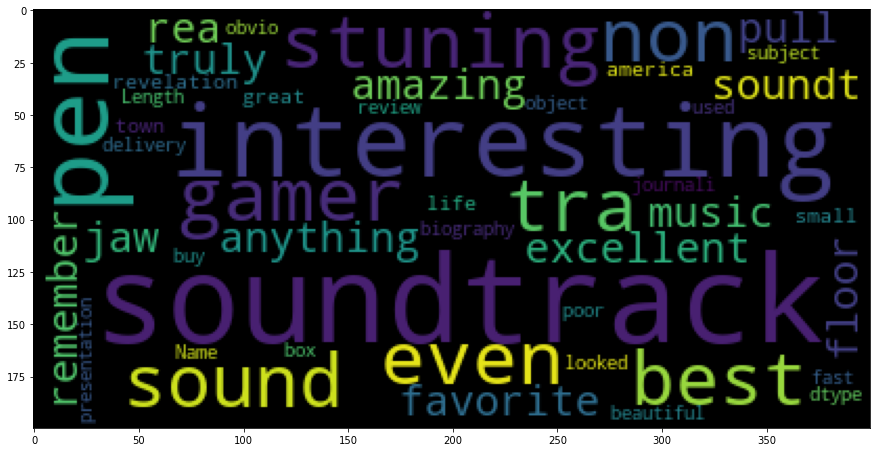

In [42]:
from wordcloud import WordCloud
WordCloud
cloud = WordCloud().generate(str(amazon['review']))
fig = plt.figure(figsize=(15,15))
plt.imshow(cloud)

# WordCloud it represent the most frequent word

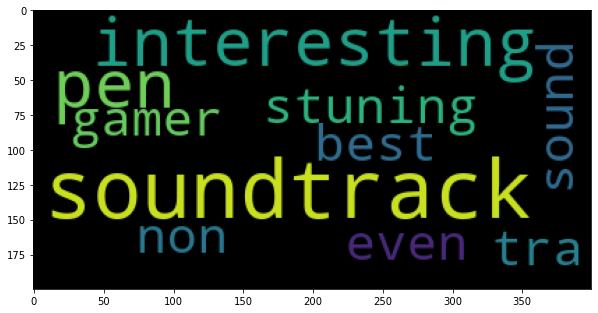

In [43]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 10).generate(str(amazon['review']) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud) 
